In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Load data
PL = pd.read_csv("results_final.csv")
PL_N = pd.read_csv("results_final_normalized.csv")

# Drop columns
             
# Drop rows with missing values
PL = PL.dropna(axis=1)  
PL_N = PL_N.dropna(axis=1)
PL_N


,season,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,...,penalty_save,total_high_claim,punches,points,Expenditure,Arrivals,Income,Departures,Balance,fs_result
0,2006-2007,Arsenal FC,0.641354,-0.978178,0.585768,-0.188564,0.087063,1.160783,1.349856,1.276897,...,-0.874510,1.713052,0.444937,0.765758,-0.793509,-1.039649,-0.509537,-0.631140,0.568915,1.596893
1,2006-2007,Aston Villa,-0.771183,-0.578282,-0.670769,-1.257096,-1.022985,-0.597786,-0.505706,-0.751818,...,-0.874510,0.120850,0.336104,-0.368058,-0.604900,-0.629949,-0.752025,-0.924092,0.110874,0.295865
2,2006-2007,Blackburn Rovers,-0.064914,0.621408,-0.105327,1.559941,1.752135,-0.514045,-0.479935,-1.563304,...,4.372551,0.069489,0.227270,-0.242078,-0.735565,0.599154,-0.397315,0.247717,0.594194,0.182732
3,2006-2007,Bolton Wanderers,0.111653,0.221511,-0.419462,2.239916,0.642087,-1.288653,-1.381944,-1.157561,...,1.224314,-0.546847,-0.208064,0.009881,-0.754621,-0.356815,-0.765560,-0.924092,0.291837,-1.005164
4,2006-2007,Chelsea FC,1.524190,-1.977919,0.648595,0.102853,0.642087,1.139848,1.092139,0.262540,...,0.174902,0.993993,-0.099231,1.710605,0.644973,-0.629949,0.609013,-0.777616,-0.289600,1.710026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2017-2018,Newcastle United,-0.594616,1.021304,-0.922077,-0.868539,-0.467961,-0.796672,-0.634565,-0.143203,...,1.224314,-0.752293,-0.534565,-0.745997,-0.181017,0.599154,-0.275789,0.980098,-0.011771,-0.552632
200,2017-2018,Southampton FC,-1.477452,0.621408,-1.047731,0.199992,-0.467961,-0.807140,-0.737652,0.465411,...,0.174902,-1.317267,-1.078732,-1.249915,0.105785,-1.449350,1.898997,-1.217045,1.549573,-0.892031
201,2017-2018,Tottenham Hotspur,1.347623,-1.178126,1.276864,-1.062817,-0.467961,1.003768,1.092139,0.059668,...,-0.874510,-1.779520,-0.208064,1.332666,1.267576,-1.039649,2.052667,-1.509997,0.190468,0.918096
202,2017-2018,Watford FC,-0.771183,1.221253,-0.607942,0.199992,0.642087,-0.911817,-1.072684,-0.954689,...,-0.874510,-1.522713,0.553771,-0.934966,0.342032,1.281989,-0.345716,1.126574,-0.747140,-0.269800


In [75]:

# Prepare data for regression

PL = PL.groupby(['season', 'team']).sum()
PL_N = PL_N.groupby(['season', 'team']).sum()

# Create x and y value
y = PL['fs_result']
X = PL.drop('fs_result', axis=1)

# Create x and y value
y_N = PL_N['fs_result']
X_N = PL_N.drop('fs_result', axis=1)



# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Split data into training and test set
X_N_train, X_N_test, y_N_train, y_N_test = train_test_split(X_N, y_N, test_size=0.2, random_state=0)

In [80]:
from sklearn.linear_model import Ridge
# Evaluate the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# Create a Ridge regression model
def ridge(alpha, X_train, y_train):
    
    ridge_model = Ridge(alpha) 

    # Fit the model to your data
    ridge_model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = ridge_model.predict(X_train)
    y_pred_test = ridge_model.predict(X_test)
    
    return y_pred_train, y_pred_test

    
alpha_values = [100.0, 200.0, 300.0, 400, 500, 600, 750, 1000]  # List of alpha values to test
for alpha in alpha_values:

    y_pred_train, y_pred_test = ridge(alpha, X_train, y_train)
    
    # Calculate the mean squared error
    MAE_Train = mean_absolute_error(y_train, y_pred_train)
    MAE = mean_absolute_error(y_test, y_pred_test)

    # Print the alpha value and corresponding MSE
    print('MSA en MAE for non-normalized data')
    print(f"Alpha: {alpha}, MAE_train: {MAE_Train}")
    print(f"Alpha: {alpha}, MAE: {MAE}")





MSA en MAE for non-normalized data
Alpha: 100.0, MAE_train: 6.757315854201308
Alpha: 100.0, MAE: 7.5165933871547335
MSA en MAE for non-normalized data
Alpha: 200.0, MAE_train: 6.766904776537385
Alpha: 200.0, MAE: 7.39561259846025
MSA en MAE for non-normalized data
Alpha: 300.0, MAE_train: 6.7826397907157325
Alpha: 300.0, MAE: 7.329646109717818
MSA en MAE for non-normalized data
Alpha: 400, MAE_train: 6.802903326629903
Alpha: 400, MAE: 7.326895258155864
MSA en MAE for non-normalized data
Alpha: 500, MAE_train: 6.818835170352897
Alpha: 500, MAE: 7.329687097897103
MSA en MAE for non-normalized data
Alpha: 600, MAE_train: 6.831724170892189
Alpha: 600, MAE: 7.3383735303163
MSA en MAE for non-normalized data
Alpha: 750, MAE_train: 6.847635937197154
Alpha: 750, MAE: 7.349963108006954
MSA en MAE for non-normalized data
Alpha: 1000, MAE_train: 6.868170888527204
Alpha: 1000, MAE: 7.372094177205709


c:\Users\ralph\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=9.74737e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [81]:
from sklearn.linear_model import Lasso

# Create a Ridge regression model
def lasso(alpha, X_train, y_train):
    
    lasso_model = Lasso(alpha) 

    # Fit the model to your data
    lasso_model.fit(X_train, y_train)
    
    # Make predictions
    # Make predictions
    y_pred_train = lasso_model.predict(X_train)
    y_pred_test = lasso_model.predict(X_test)
    
    return y_pred_train, y_pred_test
    

alpha_values = [0.0001, 0.001 ,0.1, 0.5, 0, 1.0, 2.0, 5.0]  # List of alpha values to test
for alpha in alpha_values:

    y_pred_train, y_pred_test = lasso(alpha, X_train, y_train)
    
    # Calculate the mean squared error
    MAE_train = mean_absolute_error(y_train, y_pred_train)
    MAE = mean_absolute_error(y_test, y_pred_test)
    
    # Print the alpha value and corresponding MSE
    print(f"Alpha: {alpha}, MAE_train: {MAE_train}")
    print(f"Alpha: {alpha}, MAE: {MAE}")


Alpha: 0.0001, MAE_train: 6.934035876149094
Alpha: 0.0001, MAE: 7.1355340023374225
Alpha: 0.001, MAE_train: 6.934073157225967
Alpha: 0.001, MAE: 7.134421066253236
Alpha: 0.1, MAE_train: 6.9476939442914
Alpha: 0.1, MAE: 6.9561028820108985
Alpha: 0.5, MAE_train: 6.98703585702075
Alpha: 0.5, MAE: 6.916735091687451
Alpha: 0, MAE_train: 6.93403173380722
Alpha: 0, MAE: 7.13565766190232
Alpha: 1.0, MAE_train: 7.0730273932571786
Alpha: 1.0, MAE: 7.058398539116122
Alpha: 2.0, MAE_train: 7.135311090302698
Alpha: 2.0, MAE: 7.1607569143447085
Alpha: 5.0, MAE_train: 7.3089353498124945
Alpha: 5.0, MAE: 7.438792552821186


c:\Users\ralph\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.578e+03, tolerance: 5.160e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\ralph\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.580e+03, tolerance: 5.160e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\ralph\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

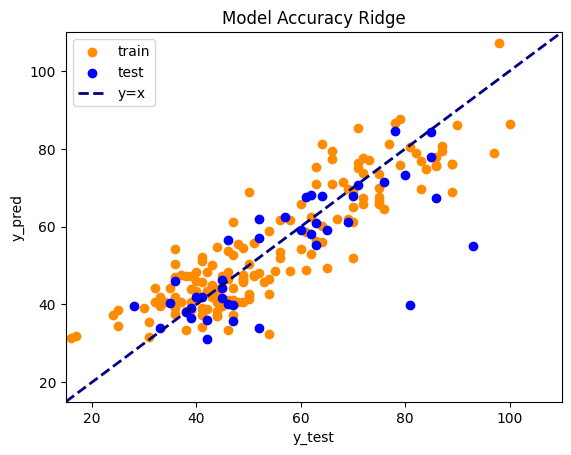

In [78]:
#Plot graph ridge
import matplotlib.pyplot as plt

y_predR_train, y_predR_test = ridge(400, X_train, y_train)

X = np.linspace(15, 110, 100)
y = X   

plt.scatter(y_train, y_predR_train, color='darkorange', label='train')
plt.scatter(y_test, y_predR_test, color='blue', label = 'test')
plt.plot(X, y, color='navy', lw=2, label='y=x', linestyle='--')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Model Accuracy Ridge')
plt.xlim(15, 110)
plt.ylim(15, 110)
plt.legend()
plt.show()


c:\Users\ralph\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.040e+03, tolerance: 5.160e+00
  model = cd_fast.enet_coordinate_descent(


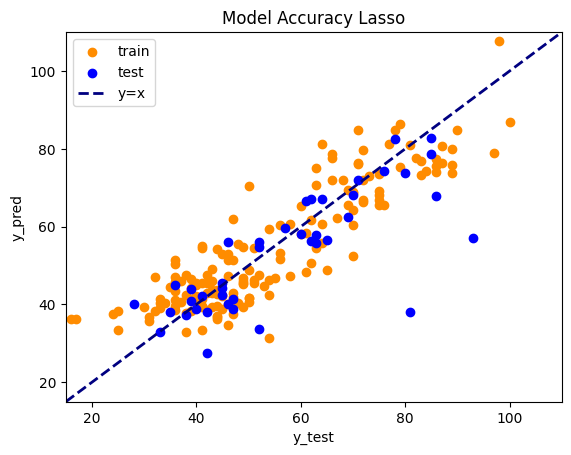

In [79]:
#Plot graph ridge
import matplotlib.pyplot as plt

y_predR_train, y_predR_test = lasso(0.5, X_train, y_train)

plt.scatter(y_train, y_predR_train, color='darkorange', label='train')
plt.scatter(y_test, y_predR_test, color='blue', label = 'test')
plt.plot(X, y, color='navy', lw=2, label='y=x', linestyle='--')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Model Accuracy Lasso')
plt.xlim(15, 110)
plt.ylim(15, 110)
plt.legend()
plt.show()